# PAIRS TRADING STRATEGY

PAIRS TRADING est une stratégie de market-neutral trading  permettant aux traders de profiter pratiquement toutes les conditions du marché : tendance haussière, tendance baissière ou mouvement latéral. Cette stratégie est classée comme une stratégie d'arbitrage statistique et de négociation de convergence(Hedging) [wikipedia](https://en.wikipedia.org/wiki/Pairs_trade)

- Qu'est ce que market-neutral trading strategy ?

market-neutral trading strategy est un type de stratégie d'investissement par un investisseur ou un gestionnaire d'investissement qui cherche à profiter à la fois de la hausse et de la baisse des prix sur un ou plusieurs marchés tout en essayant d'éviter complètement  prise la de risque de marché.

Le Trading de Paires est classée comme une stratégie d'arbitrage statistique.

- Qu'est ce que la stratégie d'arbitrage statistique ?

L'arbitrage est une stratégie d'investissement dans laquelle un investisseur achète et vend simultanément un actif sur différents marchés pour profiter d'une différence de prix et générer un profit.


## 1- PARTIE I: IMPLEMENTATION DE LA STRATEGY

### Installation des libraries

In [ ]:
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 4.4 MB/s 
     |████████████████████████████████| 83 kB 1.2 MB/s 
     |████████████████████████████████| 127 kB 34.4 MB/s 
     |████████████████████████████████| 111 kB 28.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=f3df091a4dc4791dca5c29c063a7196fd0c9de6daad0ef94f7cc58eb59251231
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=62eafa8c2ab68e611ad93497a29364e43593d9fa221e330d385c8fd8cc4325cb
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=aab375ae5c27c17a477652933e2e30c439d72b121ea089c9940153bb11956a39
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 45.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split
import pandas as pd
import yahoo_fin.stock_info as si
import yfinance as yf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Selection des Stocks et  Identification de Pairs de stocks cointegrer.
2. Effectuer le test de stationariter pour la selection des pairs.
3. Generer le Signal de Trading avec Z-Score test.
4. Calcule de de Gain et perte de notre portefeuil

## 1. Selection des Stocks et Identification de Pairs de stocks cointegrer.

In [ ]:
stocks = si.tickers_sp500(include_company_data=True)
stocks = stocks[stocks['GICS Sector']=="Information Technology"]
len(stocks) #74 stocks

74

In [ ]:
#date de debut a maintenant
fromdate = datetime(2010, 1, 1)
today = datetime.now()

#Prix des stocks de 2010 a maintenant
price = pd.DataFrame()
for ticker in stocks.Symbol:
    price[ticker] = yf.download(ticker,start=fromdate, end=today)["Adj Close"]
    price.dropna(axis = 1, inplace=True) #axis =1 supprime les stocks moins de 10 ans
len(price) #3072 ligne de donnees       # 60 stocks valable


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

3074

In [ ]:
price.head()

,ACN,ADBE,ADP,AKAM,AMD,APH,ADI,ANSS,AAPL,AMAT,...,SNPS,TEL,TER,TXN,TRMB,TYL,VRSN,V,WDC,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,33.334293,37.090000,27.358137,25.920000,9.70,10.440110,23.390224,44.639999,6.544689,11.381000,...,22.440001,19.474323,10.254251,19.031836,12.825,20.299999,21.007998,20.213858,36.334633,28.670000
2010-01-05,33.540306,37.700001,27.211222,26.690001,9.71,10.221948,23.353291,43.639999,6.556005,11.293454,...,22.250000,19.186447,10.291673,18.922073,12.760,20.780001,21.228777,19.982227,37.297981,28.620001
2010-01-06,33.896862,37.619999,27.147350,26.469999,9.57,10.260579,23.308979,43.349998,6.451722,11.269576,...,22.209999,19.575472,10.198112,18.783056,12.725,20.770000,20.999506,19.713903,37.330093,28.400000
2010-01-07,33.865173,36.889999,27.134573,26.480000,9.47,10.192401,23.124342,43.459999,6.439795,11.150194,...,22.150000,19.209785,10.254251,18.841595,12.745,20.500000,20.710794,19.897366,36.599552,27.690001
2010-01-08,33.730469,36.689999,27.096249,26.480000,9.43,10.267394,23.257282,43.759998,6.482608,11.579967,...,22.309999,19.450985,10.366524,19.273302,12.845,20.740000,20.872133,19.952408,36.784206,27.600000


In [ ]:
#train test split
train_close, test_close = train_test_split(price, test_size=0.5, shuffle=False)


Text(0.5, 1.0, 'Assets Correlation Matrix')

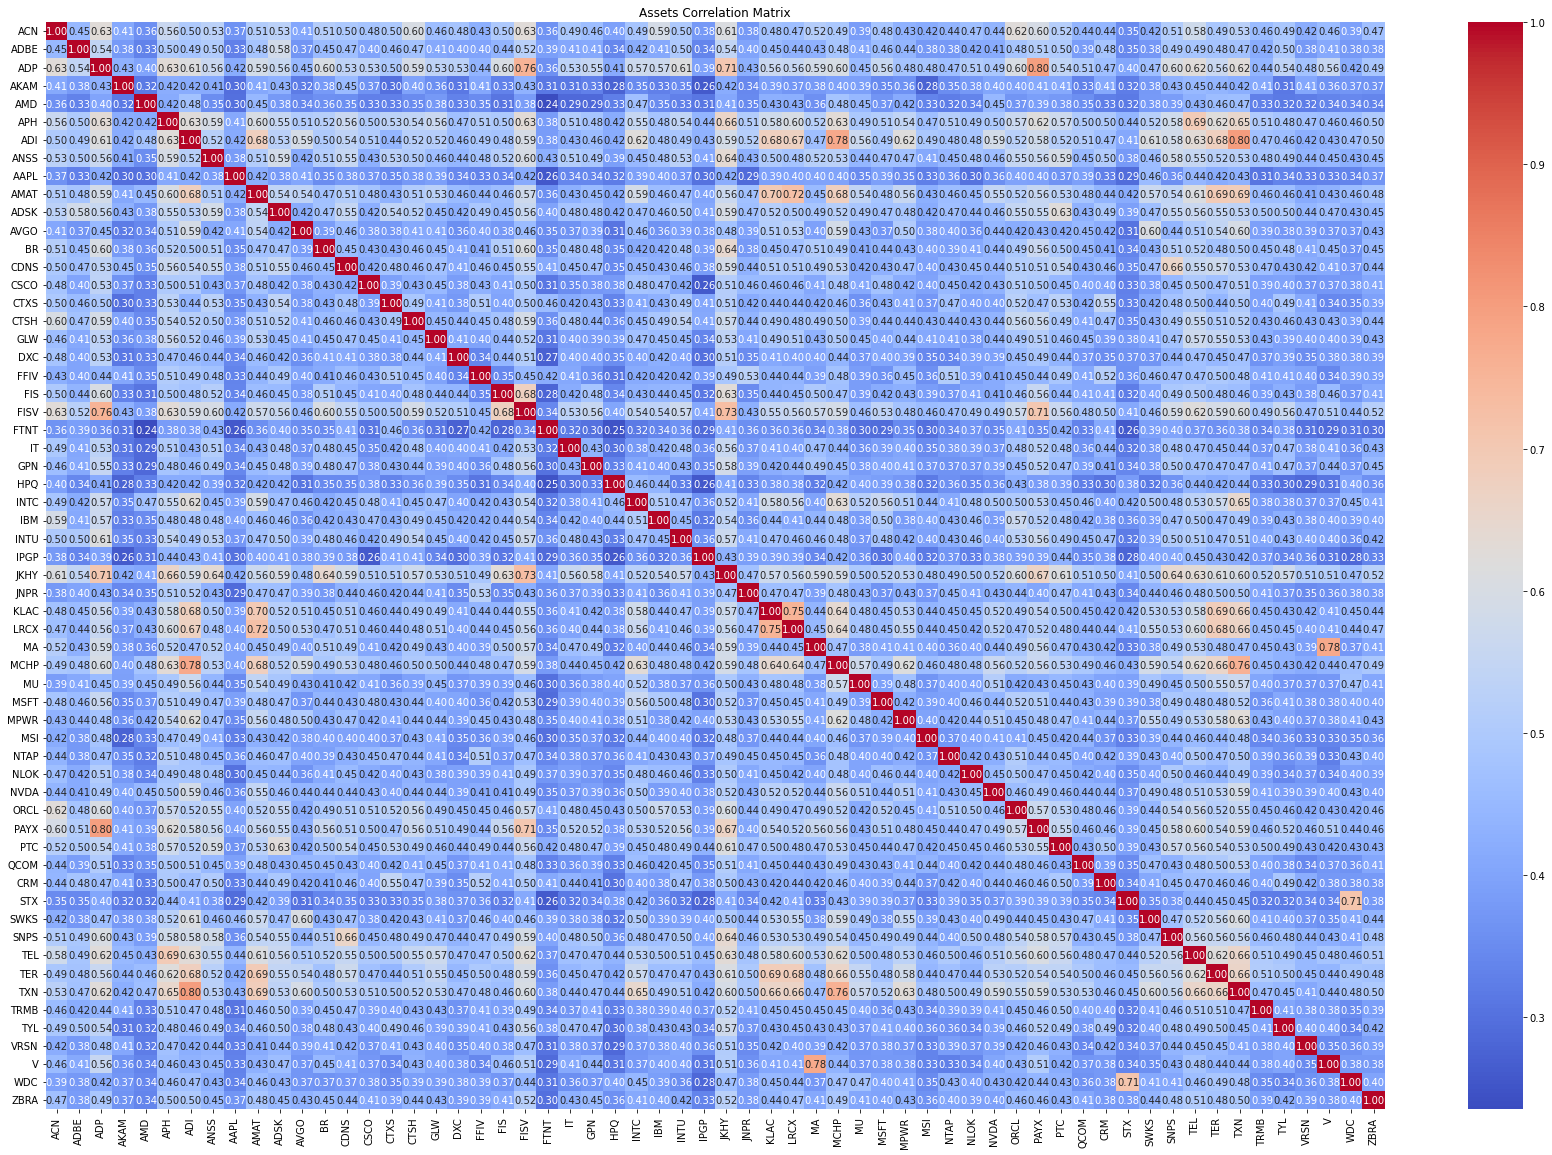

In [ ]:
"""
Person Correlation, 
"""
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
#plt.savefig(f'{dirs}/corr.png',dpi=300)





### Person Correlation, 

Le coefficient de corrélation de Pearson varie entre +1 et -1 et est une mesure linéaire de la relation entre deux variables. La valeur +1 indique une forte corrélation positive, zéro indique l'absence de relation et -1 indique une forte relation négative. Nous pouvons voir dans la carte thermique ci-dessous qu'il existe plusieurs paires avec une forte corrélation positive.

In [ ]:

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs


## Calcule du p-value


[('ACN', 'CDNS'), ('ACN', 'IT'), ('ACN', 'VRSN'), ('ADBE', 'BR'), ('ADBE', 'FIS'), ('ADBE', 'MSFT'), ('ADBE', 'MPWR'), ('ADBE', 'PAYX'), ('ADBE', 'CRM'), ('ADP', 'IT'), ('ADP', 'INTU'), ('ADP', 'KLAC'), ('AKAM', 'CSCO'), ('AMD', 'ANSS'), ('AMD', 'MSI'), ('APH', 'FIS'), ('APH', 'IT'), ('APH', 'INTU'), ('APH', 'TEL'), ('ADI', 'FIS'), ('ADI', 'IT'), ('ADI', 'INTU'), ('ADI', 'MA'), ('ADI', 'ORCL'), ('ADI', 'CRM'), ('ADI', 'SNPS'), ('ADI', 'TEL'), ('ANSS', 'MA'), ('ANSS', 'MSI'), ('ANSS', 'SNPS'), ('AMAT', 'ADSK'), ('ADSK', 'LRCX'), ('ADSK', 'MCHP'), ('ADSK', 'ORCL'), ('ADSK', 'PTC'), ('ADSK', 'TEL'), ('ADSK', 'TER'), ('ADSK', 'TXN'), ('AVGO', 'BR'), ('AVGO', 'GPN'), ('BR', 'MSFT'), ('CDNS', 'CRM'), ('CDNS', 'VRSN'), ('CTXS', 'GLW'), ('CTXS', 'DXC'), ('CTXS', 'FTNT'), ('CTXS', 'GPN'), ('CTXS', 'HPQ'), ('CTXS', 'JNPR'), ('CTXS', 'MU'), ('CTXS', 'MPWR'), ('CTXS', 'NVDA'), ('CTXS', 'STX'), ('CTXS', 'WDC'), ('CTSH', 'GPN'), ('CTSH', 'CRM'), ('FIS', 'IT'), ('FIS', 'PAYX'), ('FIS', 'CRM'), ('FIS'

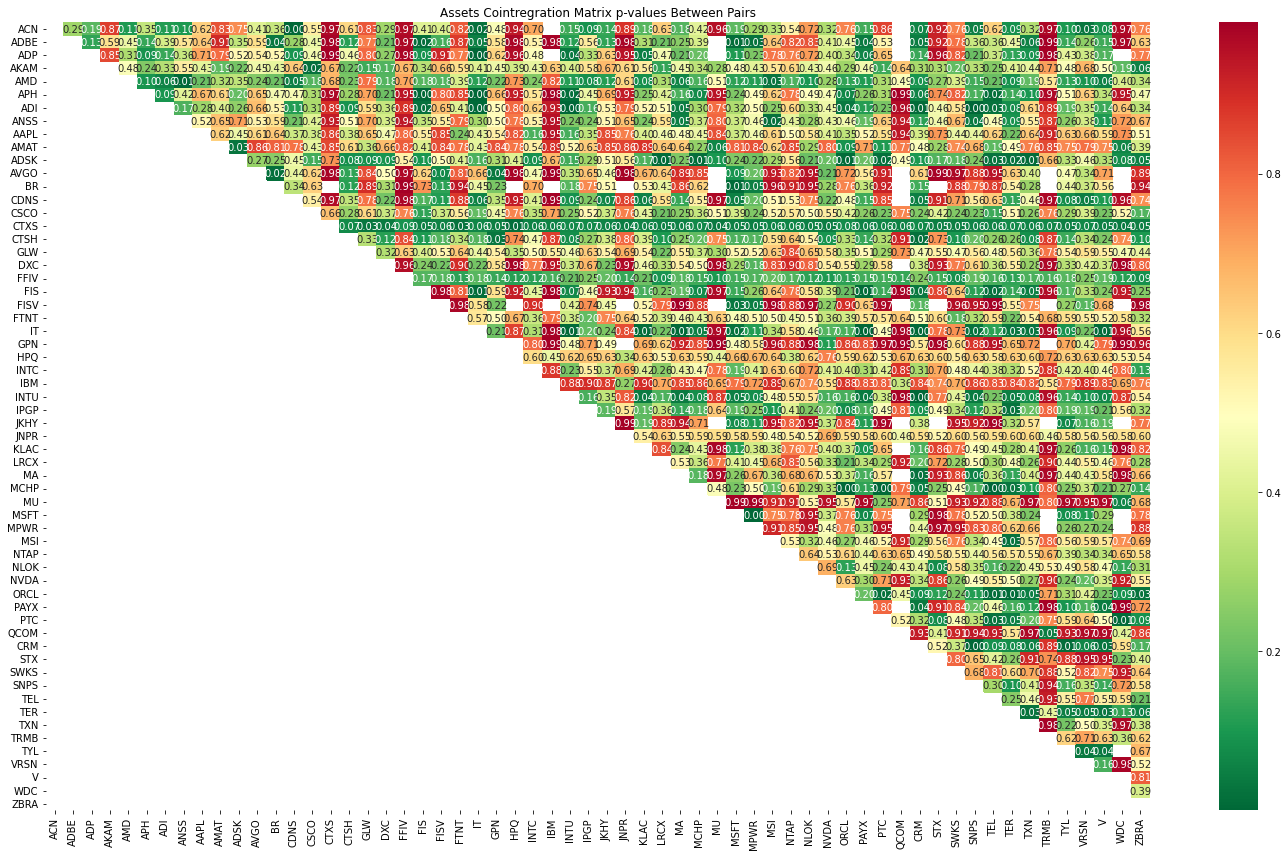

In [ ]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
#('CTXS', 'HPQ')

Analysons également le résultat du test de cointégration. Nous pouvons voir dans ci-dessus qu'il existe de nombreuses paires avec une pvalue inférieure à 0,05. Cela signifie que pour ces paires, nous pouvons rejeter l'hypothèse nulle et qu'elles peuvent être cointégrées

### Effectuer un test stationnaire pour la paire sélectionnée

Maintenant, nous avons de nombreux candidats de paires pour la stratégie où la pvalue est inférieure à 0,05. La sélection de la bonne paire est de la plus haute importance car la stratégie ne fonctionnera pas bien si les prix évoluent exactement ensemble. Ils doivent être divergents et mean-reverting pour que notre stratégie soit rentable.

Allons-y avec la paire ('CTXS', 'HPQ'), CTXS: Citrix Systems, Inc et HPQ: HP Inc,et testons davantage la stationnarité de la propagation à l'aide du test Augmented Dickey-Fuller. Il est important que la propagation soit stationnaire. Une série chronologique est considérée comme stationnaire si des paramètres tels que la moyenne et la variance ne changent pas dans le temps. Nous allons d'abord calculer le ratio de couverture(hedge ratio) entre ces deux stockers en utilisant la régression OLS. Ensuite, en utilisant le ratio de couverture(hedge ratio), nous calculerons le spread et exécuterons le test Augmented Dickey-Fuller.

In [ ]:
asset1 = 'CTXS'
asset2 = 'HPQ'

# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]


In [ ]:
train.head()

,asset1,asset2
Date,,
2010-01-04,32.704571,15.282911
2010-01-05,32.727478,15.347014
2010-01-06,32.597691,15.204236
2010-01-07,32.567158,15.210067
2010-01-08,33.452717,15.323705


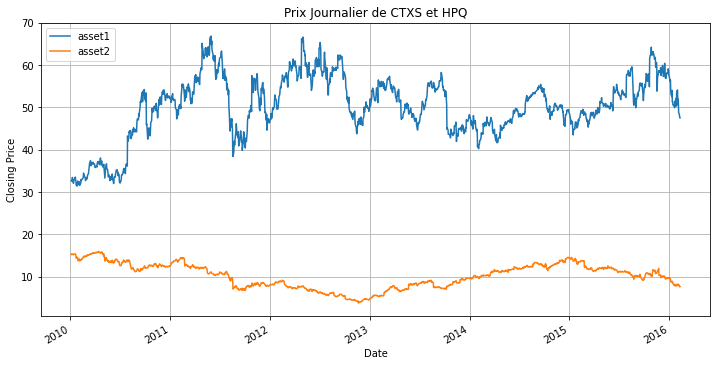

In [ ]:
# visualizer prices
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Prix Journalier de {} et {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True);

In [ ]:
# effections notre OLS regression
model=sm.OLS(train.asset1, train.asset2).fit()

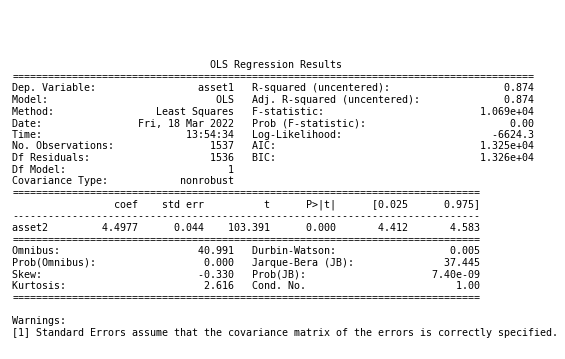

In [ ]:
# visualization du resultat du test
plt.rc('figure', figsize=(12, 8))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)


In [ ]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  4.497688958649726


In [ ]:
# calculate la dispersion
spread = train.asset1 - model.params[0] * train.asset2


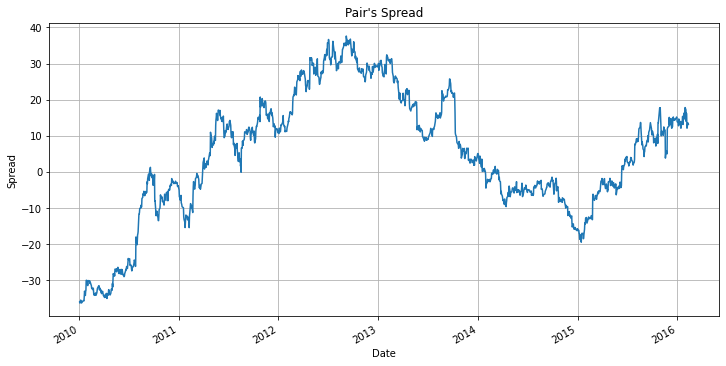

In [ ]:
# Plot the spread
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
ax.set_ylabel("Spread")
ax.grid(True);

In [ ]:
# Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])

Critical Value =  -2.3204852154340516


In [ ]:
# probablity critical values
print(adf[4])

{'1%': -3.434617276362776, '5%': -2.863424739608777, '10%': -2.5677734071449034}


### Interpretation de la propagation(spread)
Une valeur  R-square et une pvalue proche de zéro de la régression OLS suggèrent une très forte corrélation entre ces deux actions. La propagation(spread) semble stationnaire et la valeur Dickey-Fuller est de 0.005, ce qui est inférieur à la valeur au niveau de signification de 5 %. Par conséquent, nous sommes en mesure de rejeter l'hypothèse nulle selon laquelle la propagation a une racine unitaire et pouvons conclure qu'il s'agit de stationnarité.

## Générer des signaux de trading à l'aide du z-score

Nous avons utilisé l'ensemble de données d'entraînement jusqu'à présent pour finaliser la paire d'actions pour notre stratégie. À partir de maintenant, nous utiliserons l'ensemble de données de test pour nous assurer que la génération de signaux de trading et le backtesting utilisent un ensemble de données d'échantillon. Nous utiliserons le score z du rapport entre les deux cours boursiers pour générer des signaux de trading et définir les seuils supérieur et inférieur. Cela nous indiquera à quel point un prix est éloigné de la valeur moyenne de la population. S'il est positif et que la valeur est supérieure aux seuils supérieurs, le cours de l'action est supérieur à la valeur moyenne du cours. Par conséquent, son prix devrait baisser, nous voulons donc vendre cette action et acheter l'autre.

1. Definir la fonction **zscore** 

In [ ]:
# calculate z-score
def zscore(series):
 return (series - series.mean()) / np.std(series)


### 2. Creer une dataframe pour les Signaux des 2 stocks avec leur prix en utilisant les donnee du test dataset

In [ ]:
# creer une dataframe pour les signaux de trading 
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

### 3. Calculez le score z pour le rapport et définissez les seuils supérieur et inférieur avec plus et moins un écart type.

In [ ]:
# z-score and upper and lower seuils
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

### 4. Créez une colonne de signal avec la logique suivante

- Si le score z est supérieur au seuil supérieur, nous aurons -1 ( vendre),
- si le score z est inférieur au seuil inférieur, +1 (Acheter) et la valeur par défaut est nul pour aucun signal.

In [ ]:
# signaux - vendre si z-score est plus grand que le niveau a la hausse, ou acheter dans le cas contraire 
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)


### 5. 

Prenez la différence de premier ordre de la colonne de signal pour obtenir la position du stock. Si c'est +1 alors nous sommes en Achat, -1 alors vente et 0 si pas de position.

Le deuxième signal sera juste à l'opposé du premier, ce qui signifie que nous sommes Achat sur une action et simultanément courts sur l'autre. De même, prenez la différence de premier ordre pour le deuxième signal et calculez la deuxième colonne de position.

In [ ]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

In [ ]:
signals.head()

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
Date,,,,,,,,,
2016-02-11,47.621639,7.428854,0.794643,1.0,-1.0,0,NaN,0,NaN
2016-02-12,49.095024,7.758295,0.737894,1.0,-1.0,0,0.0,0,0.0
2016-02-16,50.133263,8.079497,0.653023,1.0,-1.0,0,0.0,0,0.0
2016-02-17,52.843376,8.301869,0.763526,1.0,-1.0,0,0.0,0,0.0
2016-02-18,52.331894,8.664252,0.539224,1.0,-1.0,0,0.0,0,0.0


### 6. Visualization des signaux

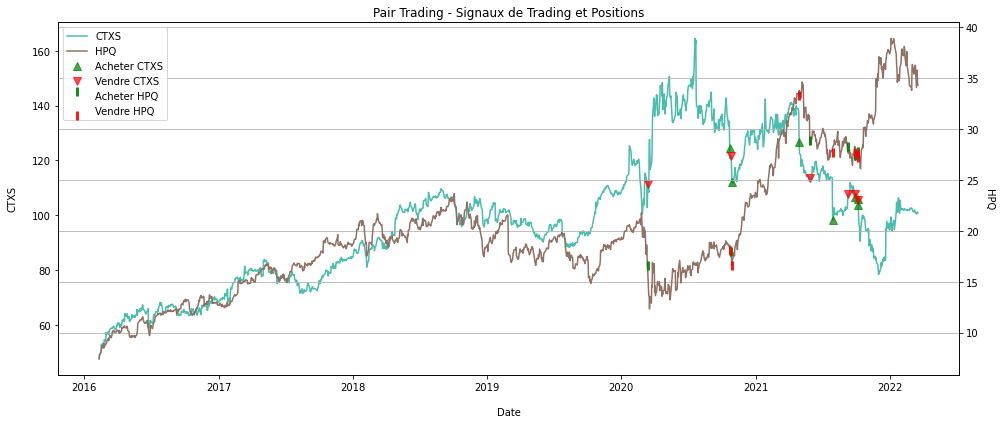

In [ ]:
# visualize trading signals and position
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac')
l2, = bx2.plot(signals['asset2'], c='#907163')

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(asset1,)
bx2.set_ylabel(asset2, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Date')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'Acheter {}'.format(asset1),
           'Vendre {}'.format(asset1),
           'Acheter {}'.format(asset2),
           'Vendre {}'.format(asset2)], loc ='best')

plt.title('Pair Trading - Signaux de Trading et Positions')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()

## 2- PARTIE II: BACTESTING

- `Le backtesting` est la méthode générale pour voir dans quelle mesure une stratégie ou un modèle aurait fonctionné ex post. Le backtesting évalue la `viabilité d'une stratégie` de trading en découvrant comment elle se déroulerait à l'aide de `données historiques`. Si le backtesting fonctionne, les traders et les analystes peuvent avoir la confiance nécessaire pour l'utiliser `à l'avenir`

- Le `backtesting` permet à un trader de `simuler une stratégie` de trading en utilisant des données historiques pour générer des résultats et analyser le `risque` et la `rentabilité` avant de risquer un `capital réel`.


## Calcul des `profits` et `pertes` du portefeuille

Nous commencerons avec un capital initial de `$100 000` et calculerons le nombre maximum d'actions en position pour chaque action en utilisant le capital initial. À un jour donné, le total des profits et pertes du premier stock sera le total de la détention de ce stock et de la position de trésorerie pour ce stock. De même, le profit et la perte pour le deuxième stock seront la détention totale du stock et les liquidités pour ce stock. Vous devez garder à l'esprit que nous avons une position neutre sur le marché(market-neutral), ce qui signifie que nous sommes acheter et vendeur simultanément avec approximativement le même capital. Enfin, pour obtenir le total des profits et pertes, nous devons agréger ces deux éléments. Sur la base de la position des actions 1 et 2, nous calculons leurs rendements quotidiens respectifs.

 - Nous commencerons avec un capital initial de $100 000 et calculerons le nombre maximum d'actions en position pour chaque action en utilisant le capital initial

In [ ]:
# capital initial de $100 000 
initial_capital = 100000

# calculerons le nombre maximum d'actions de chaque action
portefeuille1 = initial_capital// max(signals['asset1'])
portefeuille2 = initial_capital// max(signals['asset2'])
print("asset1", portefeuille1)
print("asset1", portefeuille2)

asset1 607.0
asset1 2569.0


- puisqu'il y a deux actifs, on calcule le pnl(profit et perte) de chaque actif séparément et à la fin nous les agrégeons en un seul portefeuille

In [ ]:
# pnl pour l'actif 1
portefeuille = pd.DataFrame()
portefeuille['asset1'] = signals['asset1']
portefeuille['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * portefeuille1
portefeuille['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * portefeuille1).cumsum()
portefeuille['total asset1'] = portefeuille['holdings1'] + portefeuille['cash1']
portefeuille['return1'] = portefeuille['total asset1'].pct_change()
portefeuille['positions1'] = signals['positions1']

# pnl pour l'actif 1
portefeuille['asset2'] = signals['asset2']
portefeuille['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * portefeuille2
portefeuille['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * portefeuille2).cumsum()
portefeuille['total asset2'] = portefeuille['holdings2'] + portefeuille['cash2']
portefeuille['return2'] = portefeuille['total asset2'].pct_change()
portefeuille['positions2'] = signals['positions2']



- total pnl and z-score

In [ ]:
# total pnl and z-score
portefeuille['z'] = signals['z']
portefeuille['total asset'] = portefeuille['total asset1'] + portefeuille['total asset2']
portefeuille['z upper limit'] = signals['z upper limit']
portefeuille['z lower limit'] = signals['z lower limit']
portefeuille = portefeuille.dropna()

- tracer la variation de la valeur de l'actif du portefeuille et du pnl avec le score z

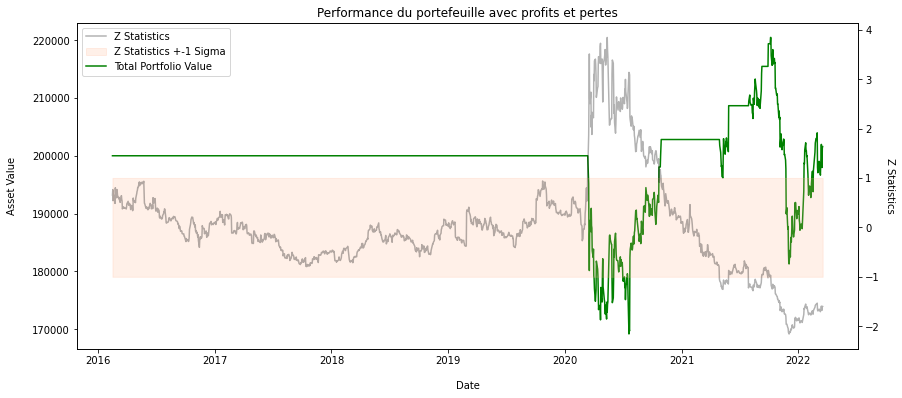

In [ ]:

fig = plt.figure(figsize=(14,6),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()
l1, = ax.plot(portefeuille['total asset'], c='g')
l2, = ax2.plot(portefeuille['z'], c='black', alpha=0.3)
b = ax2.fill_between(portefeuille.index,portefeuille['z upper limit'],\
                portefeuille['z lower limit'], \
                alpha=0.2,color='#ffb48f')
ax.set_ylabel('Asset Value')
ax2.set_ylabel('Z Statistics',rotation=270)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date')
ax.xaxis.labelpad=15
plt.title('Performance du portefeuille avec profits et pertes')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper left');



- calcule de notre CAGR(Compound Annual Growth Rate) [investopedia](https://www.investopedia.com/terms/c/cagr.asp) 

Le taux CAGR est le taux de rendement  qui serait nécessaire pour qu'un investissement passe de son solde initial à son solde final, en supposant que les bénéfices ont été réinvestis à la fin de chaque période de la durée de vie de l'investissement.

- Les investisseurs peuvent comparer le CAGR de deux alternatives pour évaluer la performance d'une action par rapport à d'autres actions d'un groupe de pairs ou d'un indice de marché


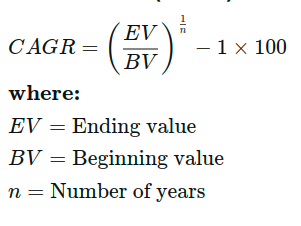

ou,

CAGR = ($\frac{VF}{VI}$)$^m$

avec:
m = 1/n

n = Numbre d'annee

VF = Valuer Finale

VI = Valeur iniatl

In [ ]:

final_portfolio = portefeuille['total asset'].iloc[-1]
delta = (portefeuille.index[-1] - portefeuille.index[0]).days
print('Number of days = ', delta)
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

Number of days =  2222
CAGR = 12.206%



le **`CAGR`** de la stratégie est de `12,206%` ce qui semble prometteur, mais il y a beaucoup de choses à considérer avant de tirer un quelconque conclusion:

- Il y a toujours une limite à l'utilisation de données historiques pour prévoir l'avenir. La bonne performance de la strategies avec les donnee historiques ne provent pas que notre stategies aura une belle performance dans le future.

- Nous n'avons pas pris en compte les coûts liés aux transactions, aux dérapages du marché etc. Normalement, une stratégie neutre au marché(market-neutral) se traduit par un nombre élevé de transactions.